In [28]:
!pip install python-dotenv -q
!pip install yfinance -q

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame
import logging
from dotenv import load_dotenv

In [8]:
load_dotenv()

True

In [9]:
api_key = os.getenv('ALPACA_API_KEY')
api_secret = os.getenv('ALPACA_API_SECRET')
data_client = StockHistoricalDataClient(api_key, api_secret)

In [10]:
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [11]:
symbols = ['AAPL']
timeframe = TimeFrame.Day
days = 10  # Past year

In [12]:
def get_historical_data(symbol, days=1):
    """Fetch historical stock data."""
    end = datetime.now()
    start = end - timedelta(days=days)
    
    request_params = StockBarsRequest(
        symbol_or_symbols=symbol,
        timeframe=timeframe,
        start=start,
        end=end
    )
    
    bars = data_client.get_stock_bars(request_params)
    df = bars.df
    if df.empty:
        logger.warning(f"No data found for {symbol}")
        return None
        
    # Reset index to make timestamp a column and sort
    df = df.reset_index()
    df = df.sort_values(by=["timestamp"])
    
    logger.info(f"Retrieved {len(df)} bars for {symbol}")
    return df

In [13]:
dataframes = {}
for symbol in symbols:
    df = get_historical_data(symbol, days)
    if df is not None:
        dataframes[symbol] = df

INFO:__main__:Retrieved 6 bars for AAPL


In [14]:
combined_df = pd.concat(dataframes, keys=symbols, names=['Symbol', 'Index'])

In [15]:
combined_df.head(20)

symbol                 timestamp     open      high     low  \
Symbol Index                                                               
AAPL   0       AAPL 2025-03-10 04:00:00+00:00  235.540  236.1600  224.22   
       1       AAPL 2025-03-11 04:00:00+00:00  223.805  225.8399  217.45   
       2       AAPL 2025-03-12 04:00:00+00:00  220.140  221.7500  214.91   
       3       AAPL 2025-03-13 04:00:00+00:00  215.950  216.8394  208.42   
       4       AAPL 2025-03-14 04:00:00+00:00  211.250  213.9500  209.58   
       5       AAPL 2025-03-17 04:00:00+00:00  213.310  214.9700  209.97   

               close      volume  trade_count        vwap  
Symbol Index                                               
AAPL   0      227.48  72071197.0    1152721.0  227.623563  
       1      220.84  76137410.0     899698.0  221.096091  
       2      216.98  62547467.0     792931.0  217.596761  
       3      209.68  61368330.0     768934.0  212.024245  
       4      213.49  60107582.0     668917.0  212.466779  
       5      211.30  21601713.0     358577.0  212.300671

In [2]:
import yfinance as yf

In [16]:
df = yf.download("AAPL", period="10d", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [18]:
df.head(20)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-03-04,235.929993,240.070007,234.679993,237.710007,53798100
2025-03-05,235.740005,236.550003,229.229996,235.419998,47227600
2025-03-06,235.330002,237.860001,233.160004,234.440002,45170400
2025-03-07,239.070007,241.369995,234.759995,235.110001,46273600
2025-03-10,227.479996,236.160004,224.220001,235.539993,72071200
2025-03-11,220.839996,225.839996,217.449997,223.809998,76137400
2025-03-12,216.979996,221.750000,214.910004,220.139999,62547500
2025-03-13,209.679993,216.839996,208.419998,215.949997,61368300


In [71]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12 entries, ('AAPL', 0) to ('NVDA', 1)
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   symbol       12 non-null     object             
 1   timestamp    12 non-null     datetime64[ns, UTC]
 2   open         12 non-null     float64            
 3   high         12 non-null     float64            
 4   low          12 non-null     float64            
 5   close        12 non-null     float64            
 6   volume       12 non-null     float64            
 7   trade_count  12 non-null     float64            
 8   vwap         12 non-null     float64            
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 1.3+ KB


In [25]:
combined_df.describe()


,open,high,low,close,volume,trade_count,vwap
count,1494.000000,1494.000000,1494.000000,1494.000000,1.494000e+03,1.494000e+03,1494.000000
mean,313.064088,316.788923,308.970618,313.015663,6.413230e+07,6.526662e+05,312.976173
std,198.982897,201.881482,195.584409,199.051273,9.396769e+07,6.495850e+05,198.901782
min,92.060000,103.410000,90.690000,98.910000,4.726056e+06,1.212250e+05,99.346923
25%,173.915000,175.992500,171.980000,173.580000,1.861931e+07,3.161215e+05,173.699497
50%,221.655000,223.995000,219.540000,221.620000,3.075522e+07,4.119060e+05,221.735927
75%,429.837500,432.992500,426.250000,430.267500,5.016307e+07,6.689130e+05,429.805331
max,1240.480000,1255.870000,1183.200000,1224.400000,8.188309e+08,7.844400e+06,1209.840187


## Charts

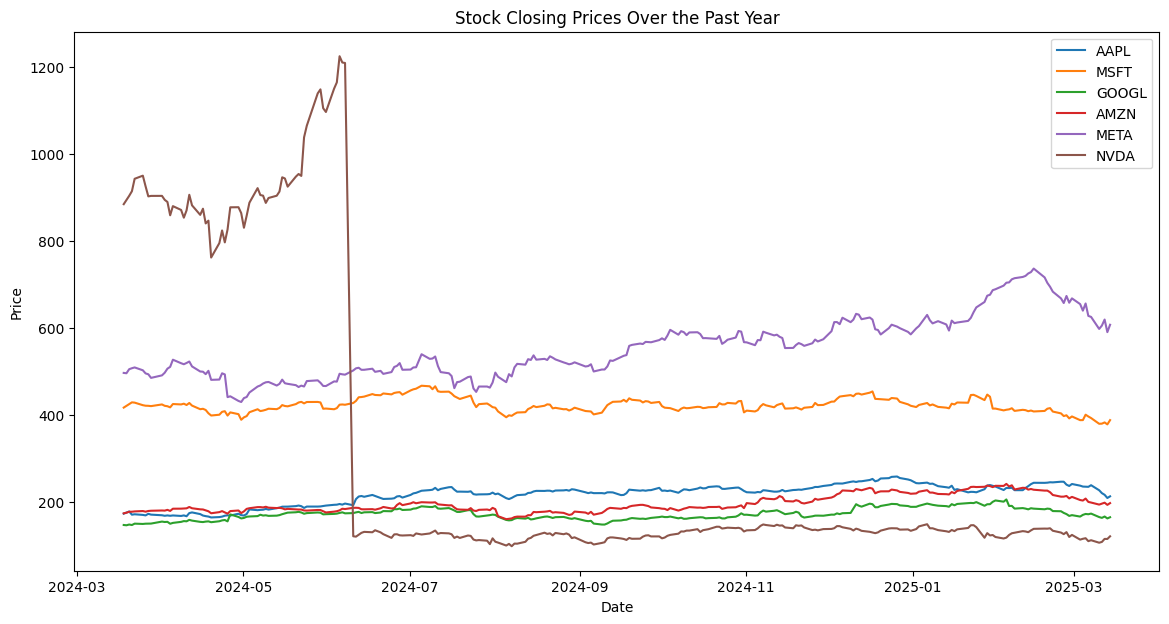

In [26]:
plt.figure(figsize=(14, 7))
for symbol in symbols:
    plt.plot(combined_df.loc[symbol]['timestamp'], combined_df.loc[symbol]['close'], label=symbol)
plt.title('Stock Closing Prices Over the Past Year')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

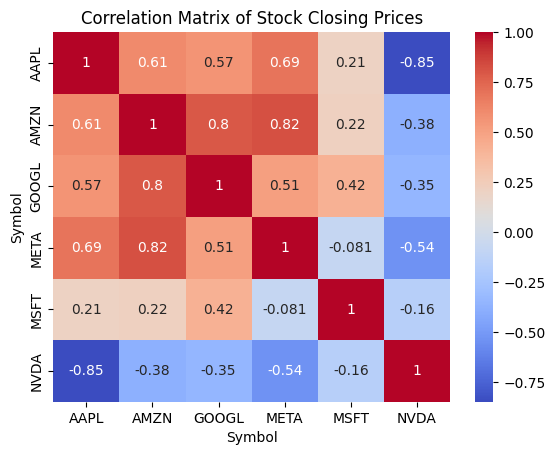

In [27]:
correlation_matrix = combined_df.pivot_table(index='timestamp', columns='Symbol', values='close').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Stock Closing Prices')
plt.show()